# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [71]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [72]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [73]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
        

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : tocopilla
Processing Record 2 of Set 1 : georgetown
Processing Record 3 of Set 1 : katsuura
Processing Record 4 of Set 1 : cherskiy
Processing Record 5 of Set 1 : tecoanapa
Processing Record 6 of Set 1 : dikson
Processing Record 7 of Set 1 : dingzhou
Processing Record 8 of Set 1 : kapaa
Processing Record 9 of Set 1 : saint-michel-des-saints
City not found. Skipping...
Processing Record 10 of Set 1 : jamestown
Processing Record 11 of Set 1 : channel-port aux basques
Processing Record 12 of Set 1 : mar del plata
Processing Record 13 of Set 1 : hede
Processing Record 14 of Set 1 : polson
Processing Record 15 of Set 1 : bulgan
Processing Record 16 of Set 1 : saint-philippe
Processing Record 17 of Set 1 : ushuaia
Processing Record 18 of Set 1 : new norfolk
Processing Record 19 of Set 1 : puerto ayora
Processing Record 20 of Set 1 : chokurdakh
Processing Record 21 of Set 1 : kisangani
Processing Record 22 

Processing Record 35 of Set 4 : tsiroanomandidy
Processing Record 36 of Set 4 : kavaratti
Processing Record 37 of Set 4 : baraut
Processing Record 38 of Set 4 : lasa
Processing Record 39 of Set 4 : vila velha
Processing Record 40 of Set 4 : pisco
Processing Record 41 of Set 4 : abu dhabi
Processing Record 42 of Set 4 : orotukan
Processing Record 43 of Set 4 : grand-santi
Processing Record 44 of Set 4 : maragogi
Processing Record 45 of Set 4 : mbaiki
Processing Record 46 of Set 4 : tiksi
Processing Record 47 of Set 4 : maniitsoq
Processing Record 48 of Set 4 : caravelas
Processing Record 49 of Set 4 : rio grande
Processing Record 50 of Set 4 : santa ines
Processing Record 0 of Set 5 : sechura
Processing Record 1 of Set 5 : sisimiut
Processing Record 2 of Set 5 : canutama
Processing Record 3 of Set 5 : imbituba
Processing Record 4 of Set 5 : norman wells
Processing Record 5 of Set 5 : iqaluit
Processing Record 6 of Set 5 : bosaso
Processing Record 7 of Set 5 : boone
Processing Record 8 o

Processing Record 23 of Set 8 : la ronge
Processing Record 24 of Set 8 : buala
Processing Record 25 of Set 8 : samarai
Processing Record 26 of Set 8 : tautira
Processing Record 27 of Set 8 : port-gentil
Processing Record 28 of Set 8 : mackay
Processing Record 29 of Set 8 : haines junction
City not found. Skipping...
City not found. Skipping...
Processing Record 30 of Set 8 : kiunga
Processing Record 31 of Set 8 : forestville
Processing Record 32 of Set 8 : carutapera
Processing Record 33 of Set 8 : yumen
Processing Record 34 of Set 8 : craig
Processing Record 35 of Set 8 : salalah
Processing Record 36 of Set 8 : ladario
Processing Record 37 of Set 8 : berdigestyakh
Processing Record 38 of Set 8 : egvekinot
Processing Record 39 of Set 8 : hualmay
Processing Record 40 of Set 8 : kurilsk
Processing Record 41 of Set 8 : svetlyy
Processing Record 42 of Set 8 : alamosa
Processing Record 43 of Set 8 : ajdabiya
Processing Record 44 of Set 8 : altay
Processing Record 45 of Set 8 : sretensk
Proc

City not found. Skipping...
Processing Record 5 of Set 12 : yeovil
Processing Record 6 of Set 12 : monrovia
Processing Record 7 of Set 12 : zherdevka
Processing Record 8 of Set 12 : batemans bay
City not found. Skipping...
Processing Record 9 of Set 12 : huarmey
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [75]:
# Count data
weather_dict.count()

City          570
Cloudiness    570
Country       570
Date          570
Humidity      570
Lat           570
Lng           570
Max Temp      570
Wind Speed    570
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [76]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tocopilla,19,CL,1595470504,71,-22.09,-70.20,56.80,5.99
1,George Town,20,MY,1595470154,83,5.41,100.34,84.20,3.36
2,Katsuura,100,JP,1595470134,84,35.13,140.30,80.01,2.98
3,Cherskiy,98,RU,1595470152,24,68.75,161.30,82.42,14.34
4,Barra de Tecoanapa,100,MX,1595470248,72,16.52,-98.75,82.45,1.81
...,...,...,...,...,...,...,...,...,...
565,Yeovil,100,GB,1595470573,93,50.94,-2.63,55.00,1.12
566,Monrovia,75,LR,1595470172,94,6.30,-10.80,73.40,5.82
567,Zherdevka,0,RU,1595470574,91,51.85,41.46,54.88,9.55
568,Batemans Bay,91,AU,1595470097,77,-35.72,150.18,55.00,4.79


In [77]:
#  Get the indices of cities that have humidity over 100%.


In [78]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [79]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

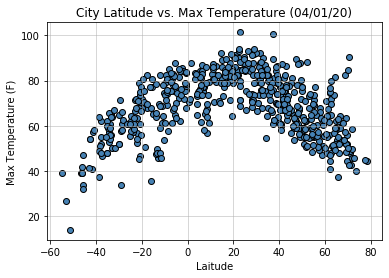

In [99]:
# Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save
plt.savefig("../Final_Data/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

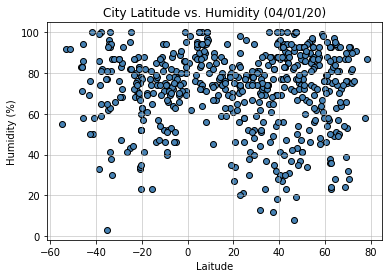

In [100]:
# Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save
plt.savefig("../Final_Data/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

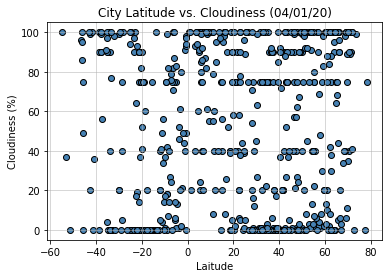

In [101]:
# Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save
plt.savefig("../Final_Data/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

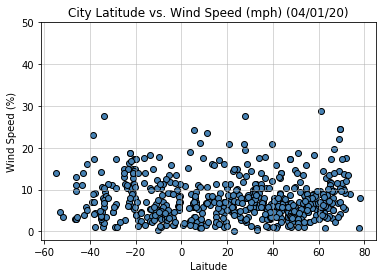

In [102]:
# Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save
plt.savefig("../Final_Data/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [103]:
# OPTIONAL: Create a function to create Linear Regression plots



In [104]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

def linear_agression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

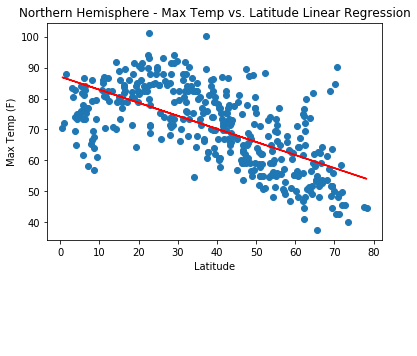

In [105]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save
plt.savefig("../Final_Data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

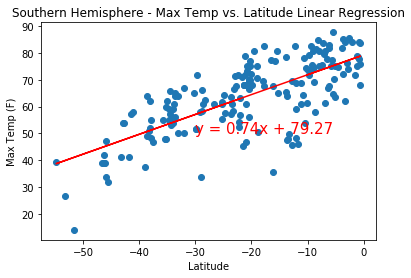

In [106]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

annotate(equation, -30, 50)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Save
plt.savefig("../Final_Data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

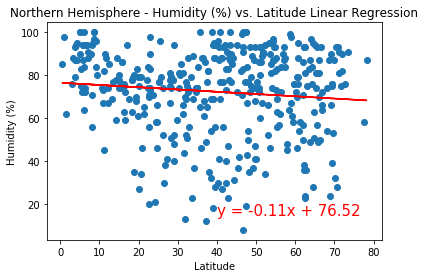

In [107]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

annotate(equation, 40, 15)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save
plt.savefig("../Final_Data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

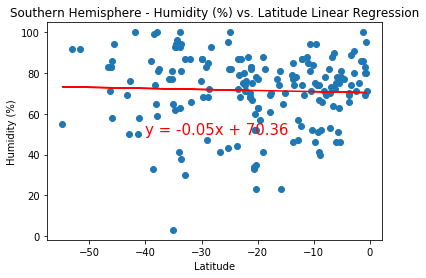

In [108]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

annotate(equation, -40, 50)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save
plt.savefig("../Final_Data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

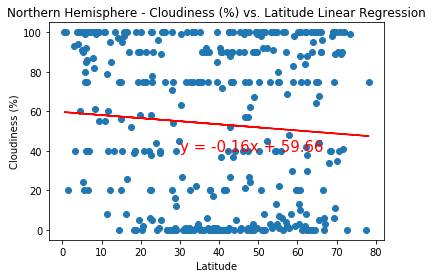

In [109]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
annotate(equation, 30, 40)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save
plt.savefig("../Final_Data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

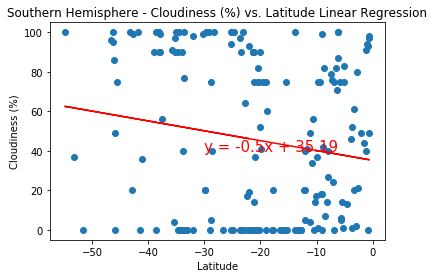

In [110]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save
plt.savefig("../Final_Data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

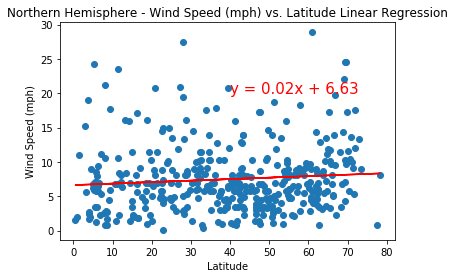

In [111]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
annotate(equation, 40, 20)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save
plt.savefig("../Final_Data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

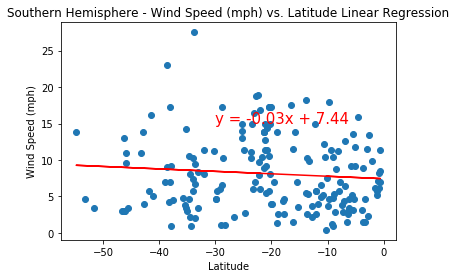

In [112]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

annotate(equation, -30, 15)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save
plt.savefig("../Final_Data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")